In [4]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [8]:
df=pd.read_csv('C:/Users/LENOVO/email.csv')
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [9]:
df.isna().sum()

Category    0
Message     0
dtype: int64

In [10]:
df.dropna(inplace=True)
df

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [11]:
df.duplicated().sum()

np.int64(415)

In [12]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

np.int64(0)

In [13]:
df.head(5)

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [14]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import seaborn as sns
%matplotlib inline

In [15]:
x=df['Message']
y=df['Category']
x_train, x_test,y_train, y_test = train_test_split(df["Message"],df["Category"],test_size = 0.2,random_state=42)

In [16]:
cv=CountVectorizer()
x_train_vectorized = cv.fit_transform(x_train)
x_test_vectorized = cv.transform(x_test)
print(x_test_vectorized)

<Compressed Sparse Row sparse matrix of dtype 'int64'
	with 12523 stored elements and shape (1032, 7650)>
  Coords	Values
  (0, 887)	1
  (0, 3208)	1
  (0, 4182)	1
  (0, 4852)	1
  (0, 5831)	1
  (0, 6023)	1
  (0, 6745)	1
  (1, 2126)	1
  (1, 3465)	1
  (1, 4140)	1
  (1, 4717)	1
  (1, 6876)	1
  (1, 7125)	1
  (1, 7574)	1
  (2, 1741)	1
  (2, 1837)	1
  (2, 2525)	1
  (2, 3243)	1
  (2, 4536)	1
  (2, 6633)	1
  (2, 6726)	1
  (3, 1526)	1
  (3, 3696)	1
  (3, 4331)	1
  (3, 4828)	1
  :	:
  (1030, 5871)	1
  (1030, 6015)	1
  (1030, 6712)	1
  (1030, 6713)	4
  (1030, 6835)	1
  (1030, 7107)	1
  (1030, 7293)	2
  (1030, 7610)	1
  (1031, 291)	1
  (1031, 509)	1
  (1031, 642)	1
  (1031, 1158)	1
  (1031, 1627)	2
  (1031, 2075)	1
  (1031, 3406)	1
  (1031, 3579)	1
  (1031, 3683)	1
  (1031, 4322)	1
  (1031, 4536)	1
  (1031, 4759)	1
  (1031, 4863)	1
  (1031, 5440)	1
  (1031, 5912)	1
  (1031, 6835)	2
  (1031, 7107)	2


In [17]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix

In [18]:
lg=LogisticRegression()
lg.fit(x_train_vectorized,y_train)

LogisticRegression()

In [19]:
y_pred=lg.predict(x_test_vectorized)
y_pred

array(['ham', 'ham', 'ham', ..., 'ham', 'ham', 'spam'], dtype=object)

In [20]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, pos_label='spam')
recall = recall_score(y_test, y_pred, pos_label='spam')
f1 = f1_score(y_test, y_pred, pos_label='spam')

print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1 score: {f1:.4f}')

Accuracy: 0.9787
Precision: 0.9754
Recall: 0.8623
F1 score: 0.9154


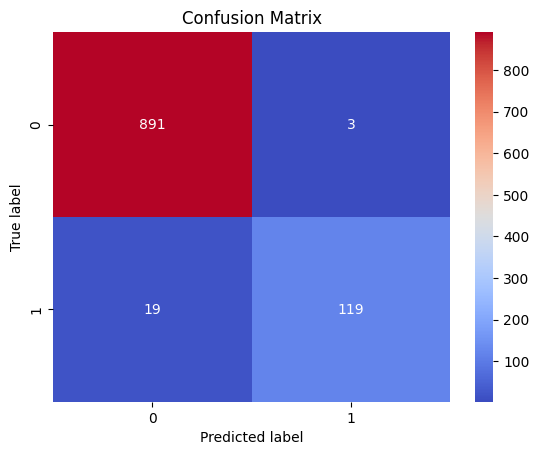

In [24]:
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, cmap="coolwarm", fmt="d")

plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion Matrix')

plt.show()